# Compare the DBNNs to Other Tests on Set $\mathcal{D}$

## Set up The Environment

In [1]:
# Import everything that's needed to run the notebook
import os
import pickle
import dill
import pathlib
import datetime
import random

from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import util
import robust
from ipynb.fs.defs.descriptor_based_neural_networks import DescriptorBuilder, dbnn_output, prepare_input
from ipynb.fs.defs.construct_sbnn import SBNNPreprocessor
from sklearn.model_selection import learning_curve

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [2]:
# Define the path to the configuration dictionary
config_path = 'configuration.p'

# Load the configuration dictionary
with open(config_path, 'rb') as f:
    configuration = pickle.load(f)
    
# Get the paths to the relevant directories 
data_directory_path = configuration['data']['directory_path']
classifiers_directory_path = configuration['classifiers']['directory_path']

## Load and Prepare Set $\mathcal{D}$

In [4]:
# Define the dictionary to store the actual datasets, indexed by their names
datasets = {}

# Load the dataset
set_path = configuration['data']['datasets']['D']['path']
print('Loading {} from {}'.format('D', set_path))
set_D = util.load_from_file(set_path)

# Separate the labels from the samples
labels = [sample.pop() for sample in set_D]
samples = set_D

print('Done.')

Loading D from data/D.data
Done.


## Load the Storages of Results and Reports

In [3]:
dbnn_storage = {}

results_directory_path = configuration['results']['directory_path']
path = os.path.join(results_directory_path, 'dbnn_results.p')
with open(path, 'rb') as f:
    dbnn_storage['results'] = pickle.load(f)

reports_directory_path = configuration['reports']['directory_path']
path = os.path.join(reports_directory_path, 'dbnn')
path = os.path.join(path, 'dbnn_reports.p')
with open(path, 'rb') as f:
    dbnn_storage['reports'] = pickle.load(f)

## Load the Tests

In [6]:
# Make a dictionary to hold the tests
test_classifiers = {}

# Specify the classical tests
codes = ['SW', 'SF', 'LF', 'JB', 'DP', 'AD', 'CVM', 'FSSD']

# Load the classical tests
for test_code in codes:
    test, statistic = util.get_test(test_code)
    for alpha in [0.01, 0.05]:
        test_classifiers[(test_code, alpha)] = util.TestClassifier(test, statistic, alpha)

# Although SBNN is not technically a test, consider it too.
with open(os.path.join('classifiers', 'sbnn.p'), 'rb') as f:
    sbnn = pickle.load(f)

test_classifiers[('SBNN', '')] = sbnn
codes += ['SBNN']

# Specify the robustified tests
robust_codes = ['MMRT1', 'MMRT2', 'TTRT1', 'TTRT2', 'RSW', 'RLM']

# Load the robustified tests
for test_code in robust_codes:
    test, statistic = robust.get_robust_test(test_code)
    for alpha in [0.01, 0.05]:
        test_classifiers[(test_code, alpha)] = util.TestClassifier(test, statistic, alpha)

## Load the DBNNs

In [14]:
with open('dbnns1.p', 'rb') as f:
    dbnns = dill.load(f)

dbnn = dbnns['DBNN']

## Compare by TPR, PPV, TNR, NPV, and F1

In [18]:
dbnn_storage['results']['comparison']['D'] = {}

In [19]:
#dbnn_storage['results']['comparison']['D'] = {}

metrics = ['A', 'TPR', 'PPV', 'TNR', 'NPV', 'F1']

for (code, alpha) in test_classifiers:
    print(code, alpha)
    if (code, alpha) not in dbnn_storage['results']['comparison']['D']:
        classifier = test_classifiers[(code, alpha)]
        results_df = util.evaluate_pretty(samples, labels, classifier, metrics=metrics)
        dbnn_storage['results']['comparison']['D'][(code, alpha)] = results_df

SW 0.01


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


SW 0.05


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


SF 0.01
SF 0.05
LF 0.01
LF 0.05
JB 0.01


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


JB 0.05


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


DP 0.01


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


DP 0.05


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


AD 0.01


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1785: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


AD 0.05


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1785: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


CVM 0.01
CVM 0.05
FSSD 0.01
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. 

sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. 

/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/milos/statisticka_klasifikacija/2020/github/construct_sbnn.ipynb:152: RuntimeWarning: divide by zero encountered in double_scalars
  "end_time": "2021-04-27T18:30:42.794129Z",
/home/milos/statisticka_klasifikacija/2020/github/construct_sbnn.ipynb:152: RuntimeWarning: invalid value encountered in double_scalars
  "end_time": "2021-04-27T18:30:42.794129Z

MMRT1 0.01


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


MMRT1 0.05


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


MMRT2 0.01


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


MMRT2 0.05


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


TTRT1 0.01


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


TTRT1 0.05


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


TTRT2 0.01


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


TTRT2 0.05


/home/milos/statisticka_klasifikacija/2020/github/robust.py:54: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = (numerator_1 ** a1) / (denominator_1 ** a2) - k1
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2
/home/milos/statisticka_klasifikacija/2020/github/robust.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  kurtosis_estimate = (numerator_2 ** a3) / (denominator_2 ** a4) - k2


RSW 0.01
RSW 0.05
RLM 0.01


/home/milos/statisticka_klasifikacija/2020/github/robust.py:117: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = numerator_1 / (denominator_1 ** 1.5)
/home/milos/statisticka_klasifikacija/2020/github/robust.py:122: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = max(-2, numerator_2 / (denominator_2 ** 4) - 3)
/home/milos/statisticka_klasifikacija/2020/github/robust.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  skewness_estimate = numerator_1 / (denominator_1 ** 1.5)


RLM 0.05


/home/milos/statisticka_klasifikacija/2020/github/robust.py:117: RuntimeWarning: invalid value encountered in double_scalars
  skewness_estimate = numerator_1 / (denominator_1 ** 1.5)
/home/milos/statisticka_klasifikacija/2020/github/robust.py:122: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis_estimate = max(-2, numerator_2 / (denominator_2 ** 4) - 3)
/home/milos/statisticka_klasifikacija/2020/github/robust.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  skewness_estimate = numerator_1 / (denominator_1 ** 1.5)


In [20]:
results_dict = dbnn_storage['results']['comparison']['D']

for name in dbnns:
    if 'opt' in name:
        alpha = 'opt'
    elif not '(' in name:
        alpha = ''
    elif '0.01' in name:
        alpha = 0.01
    elif '0.05' in name:
        alpha = 0.05
    elif '0.1' in name:
        alpha = 0.1
        
    key = ('DBNN', alpha)
    
        
    print(key)
    
    results_dict[key] = util.evaluate_pretty(samples, labels, dbnns[name],
                                                      metrics=metrics)

('DBNN', 0.01)
('DBNN', 0.05)
('DBNN', 0.1)
('DBNN', '')
('DBNN', 'opt')


In [23]:
df_report = pd.concat(results_dict)
df_report.index=pd.MultiIndex.from_tuples([(x[0], x[1]) for x in df_report.index])

latex_report = util.get_latex_table(df_report, index=True, caption='D', label='D')

dbnn_storage['reports']['comparison']['D'] = {
    'df' : df_report,
    'latex' : latex_report
}

display(df_report)
print(latex_report)

A       TPR       PPV       TNR       NPV        F1
SW    0.01  0.816130  0.989962  0.734577  0.642299  0.984612  0.843359
      0.05  0.834330  0.948889  0.772007  0.719770  0.933698  0.851358
SF    0.01  0.819693  0.988812  0.738891  0.650575  0.983094  0.845776
      0.05  0.843602  0.946973  0.784735  0.740230  0.933153  0.858254
LF    0.01  0.756169  0.991264  0.674242  0.521073  0.983512  0.802581
      0.05  0.790498  0.951801  0.719641  0.629195  0.928846  0.819597
JB    0.01  0.807701  0.984521  0.727314  0.630881  0.976052  0.836594
      0.05  0.825939  0.966667  0.754350  0.685211  0.953610  0.847412
DP    0.01  0.809923  0.980000  0.731260  0.639847  0.969690  0.837552
      0.05  0.828851  0.944674  0.767001  0.713027  0.927994  0.846616
AD    0.01  0.797701  0.990038  0.714997  0.605364  0.983811  0.830334
      0.05  0.824789  0.947969  0.760590  0.701609  0.930961  0.844005
CVM   0.01  0.786437  0.989119  0.703817  0.583755  0.981701  0.822428
      0.05  0.814521  0.948123  0.748201  0.680920  0.929206  0.836381
FSSD  0.01  0.484018  0.692261  0.491834  0.272089  0.464890  0.575084
      0.05  0.510764  0.679387  0.511303  0.339156  0.509668  0.583481
SBNN        0.847318  0.920843  0.802792  0.773793  0.907196  0.857775
MMRT1 0.01  0.807433  0.989579  0.725343  0.625287  0.983607  0.837104
      0.05  0.836590  0.946437  0.775963  0.726743  0.931356  0.852763
MMRT2 0.01  0.798391  0.989579  0.715854  0.607203  0.983127  0.830749
      0.05  0.834674  0.947663  0.772986  0.721686  0.932383  0.851458
TTRT1 0.01  0.645747  0.990038  0.586313  0.301456  0.968012  0.736476
      0.05  0.688467  0.952031  0.623413  0.424904  0.898558  0.753449
TTRT2 0.01  0.784866  0.988506  0.702423  0.581226  0.980608  0.821264
      0.05  0.811149  0.949502  0.743713  0.672797  0.930183  0.834102
RSW   0.01  0.776092  0.989655  0.693460  0.562529  0.981942  0.815495
      0.05  0.806284  0.950728  0.737634  0.661839  0.930711  0.830733
RLM   0.01  0.548046  0.990192  0.525498  0.105900  0.915232  0.686610
      0.05  0.579617  0.949272  0.545775  0.209962  0.805409  0.693074
DBNN  0.01  0.853372  0.990498  0.777317  0.716245  0.986907  0.871054
      0.05  0.897050  0.949579  0.859302  0.844521  0.943660  0.902188
      0.1   0.909004  0.902989  0.913984  0.915019  0.904142  0.908453
            0.922490  0.898161  0.944100  0.946820  0.902886  0.920558
      opt   0.922452  0.893410  0.948503  0.951494  0.899261  0.920133

\begin{table}
\centering
\caption{D}
\label{D}
\begin{tabular}{llrrrrrr}
\toprule
     &     &       A &     TPR &     PPV &     TNR &     NPV &      F1 \\
\midrule
SW & 0.01 & $0.816$ & $0.990$ & $0.735$ & $0.642$ & $0.985$ & $0.843$ \\
     & 0.05 & $0.834$ & $0.949$ & $0.772$ & $0.720$ & $0.934$ & $0.851$ \\
SF & 0.01 & $0.820$ & $0.989$ & $0.739$ & $0.651$ & $0.983$ & $0.846$ \\
     & 0.05 & $0.844$ & $0.947$ & $0.785$ & $0.740$ & $0.933$ & $0.858$ \\
LF & 0.01 & $0.756$ & $0.991$ & $0.674$ & $0.521$ & $0.984$ & $0.803$ \\
     & 0.05 & $0.790$ & $0.952$ & $0.720$ & $0.629$ & $0.929$ & $0.820$ \\
JB & 0.01 & $0.808$ & $0.985$ & $0.727$ & $0.631$ & $0.976$ & $0.837$ \\
     & 0.05 & $0.826$ & $0.967$ & $0.754$ & $0.685$ & $0.954$ & $0.847$ \\
DP & 0.01 & $0.810$ & $0.980$ & $0.731$ & $0.640$ & $0.970$ & $0.838$ \\
     & 0.05 & $0.829$ & $0.945$ & $0.767$ & $0.713$ & $0.928$ & $0.847$ \\
AD & 0.01 & $0.798$ & $0.990$ & $0.715$ & $0.605$ & $0.984$ & $0.830$ \\
     & 0.05 & $0.825$ 

## Compare AUROC

In [42]:
auroc_data = {}

In [61]:
print('DBNN')
prepared_input = prepare_input(samples, dbnn)
probabilities = dbnn['neural_net'].predict_proba(prepared_input)
scores = probabilities[:, 1]
mask = np.isfinite(np.array(scores))    
filtered_labels = np.array(labels)[mask]
filtered_scores = np.array(scores)[mask]

fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)

auroc_data['DBNN'] = {
    'fpr' : fpr,
    'tpr' : tpr,
    'tr'  : tr,
    'auroc' : sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)
}


for key in test_classifiers:
    if key[0] not in ['DP', 'CVM']:
        continue
    if key[0] == 'SBNN':
        continue
    if key[1] in ['', 0.01]:
        alpha = 0.01
    else:
        continue

    print(key)
    code = key[0]
    statistic = test_classifiers[key].statistic
    scores = np.array([statistic(sample) for sample in samples])
    
    if code in ['LF', 'JB', 'AD', 'FSSD', 'MMRT1', 'MMRT2', 'TTRT1', 'TTRT2', 'DP', 'CVM']:
        scores = -scores
    
    mask = np.isfinite(scores)   
    filtered_labels = np.array(labels)[mask]
    filtered_scores = np.array(scores)[mask]
    
    fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)
    
    auroc_data[code] = {
        'fpr' : fpr,
        'tpr' : tpr,
        'tr'  : tr,
        'auroc' : sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)
    }
    


print('SBNN')
data = sbnn['preprocessor'].transform(samples)
data = sbnn['scaler'].transform(data)
prepared_input = sbnn['imputer'].transform(data)
probabilities = sbnn['neural_net'].predict_proba(prepared_input)
scores = probabilities[:, 1]
mask = np.isfinite(np.array(scores))    
filtered_labels = np.array(labels)[mask]
filtered_scores = np.array(scores)[mask]
fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)

auroc_data['SBNN'] = {
    'fpr' : fpr,
    'tpr' : tpr,
    'tr'  : tr,
    'auroc' : sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)
}

DBNN
('DP', 0.01)


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


('CVM', 0.01)
SBNN


/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/milos/statisticka_klasifikacija/p39normal/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/milos/statisticka_klasifikacija/2020/github/construct_sbnn.ipynb:152: RuntimeWarning: divide by zero encountered in double_scalars
  "end_time": "2021-04-27T18:30:42.794129Z",
/home/milos/statisticka_klasifikacija/2020/github/construct_sbnn.ipynb:152: RuntimeWarning: invalid value encountered in double_scalars
  "end_time": "2021-04-27T18:30:42.794129Z

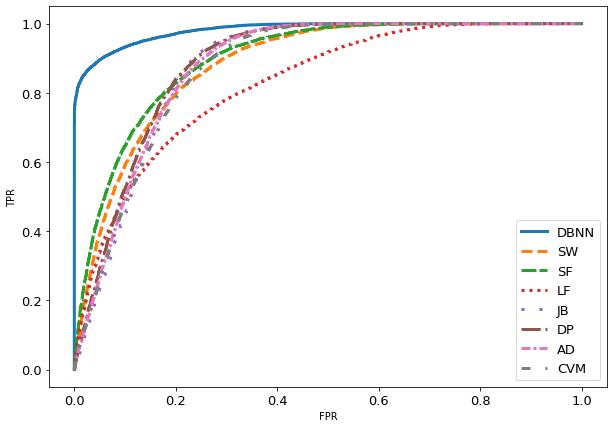

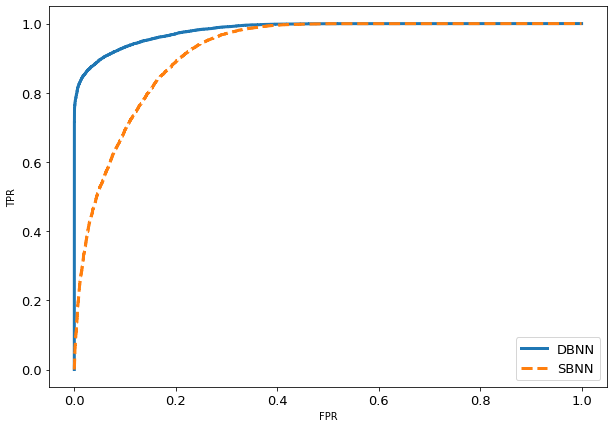

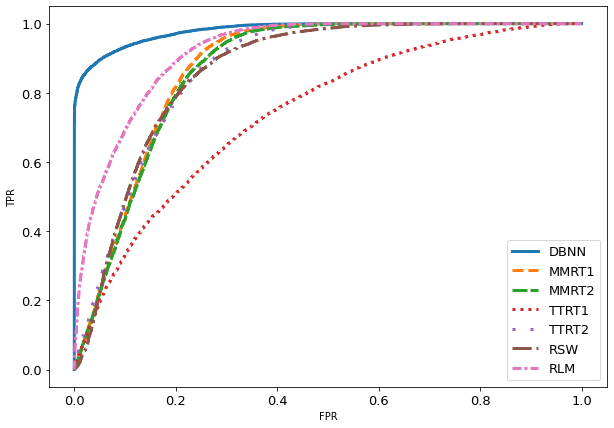

In [90]:
figures = {}
styles = ['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5))] * 4

groups = {
    'classical' : ['DBNN', 'SW', 'SF', 'LF', 'JB', 'DP', 'AD', 'CVM'], 
    'neural' : ['DBNN', 'SBNN'], 
    'robustified' : ['DBNN', 'MMRT1', 'MMRT2', 'TTRT1', 'TTRT2', 'RSW', 'RLM']
}


for group_name in groups:
    group = groups[group_name]
    
    fig = plt.figure(figsize=(10, 7))
    
    styles = ['solid', 
              'dashed', (0, (5, 1)), 
              'dotted', (0, (1, 5)), 
              'dashdot', (0, (3, 1, 1, 1)), (0, (3, 5, 1, 5)) ]
    
    for code in group:
        fpr = auroc_data[code]['fpr']
        tpr = auroc_data[code]['tpr']
        plt.plot(fpr, tpr, label=code, linewidth=3, linestyle=styles.pop(0))
        
    plt.legend(fontsize=15)
    
    figures[group_name + '_fig'] = fig
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(fontsize=13)

In [82]:
df = pd.DataFrame([auroc_data[code]['auroc'] for code in auroc_data], auroc_data.keys())
df.columns = ['AUROC']
df.sort_values(by='AUROC', ascending=False, inplace=True)
df

,AUROC
DBNN,0.981420
RLM,0.920756
SBNN,0.920756
SF,0.896466
DP,0.885473
SW,0.881795
AD,0.878699
JB,0.876434
MMRT1,0.874630
CVM,0.871819


In [83]:
figures

{'classical_fig': <Figure size 720x504 with 1 Axes>,
 'neural_fig': <Figure size 720x504 with 1 Axes>,
 'robustified_fig': <Figure size 720x504 with 1 Axes>}

In [93]:
latex = util.get_latex_table(df, index=True)
print(latex)
#dbnn_storage['results']['comparison']['D'] = {}
dbnn_storage['reports']['comparison']['D']['auroc'] = {'df' : df, 'latex' : latex}
dbnn_storage['reports']['comparison']['D']['auroc'].update(figures)

\begin{tabular}{lr}
\toprule
{} &   AUROC \\
\midrule
DBNN  & $0.981$ \\
RLM   & $0.921$ \\
SBNN  & $0.921$ \\
SF    & $0.896$ \\
DP    & $0.885$ \\
SW    & $0.882$ \\
AD    & $0.879$ \\
JB    & $0.876$ \\
MMRT1 & $0.875$ \\
CVM   & $0.872$ \\
TTRT2 & $0.871$ \\
MMRT2 & $0.870$ \\
RSW   & $0.866$ \\
LF    & $0.826$ \\
TTRT1 & $0.740$ \\
FSSD  & $0.596$ \\
\bottomrule
\end{tabular}



## Save

In [23]:
results_directory_path = configuration['results']['directory_path']
path = os.path.join(results_directory_path, 'dbnn_results.p')
with open(path, 'wb') as f:
    pickle.dump(dbnn_storage['results'], f)

reports_directory_path = configuration['reports']['directory_path']
path = os.path.join(reports_directory_path, 'dbnn')
pathlib.Path(*path.split(os.sep)).mkdir(parents=True, exist_ok=True)

reports_directory_path = path
path = os.path.join(reports_directory_path, 'dbnn_reports.p')
with open(path, 'wb') as f:
    pickle.dump(dbnn_storage['reports'], f)

In [5]:
util.traverse_and_save(dbnn_storage['reports'], 
                       configuration['reports']['directory_path'])

Saving reports/evaluation/calibration/calibration_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/calibration/calibration_fig.eps
Saving reports/evaluation/calibration/calibration_mean_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/calibration/calibration_mean_fig.eps
Saving reports/evaluation/DBNN(0.01)/F/F_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/DBNN(0.01)/F/F_fig.eps
Saving reports/evaluation/DBNN(0.05)/F/F_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/DBNN(0.05)/F/F_fig.eps
Saving reports/evaluation/DBNN(0.1)/F/F_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/DBNN(0.1)/F/F_fig.eps
Saving reports/evaluation/DBNN/F/F_fig.pdf
Saving reports/evaluation/DBNN/F/F_fig.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/DBNN(opt)/F/F_fig.pdf
Saving reports/evaluation/DBNN(opt)/F/F_fig.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/AB/AB_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/AB/AB_fig.eps
Saving reports/evaluation/F-left/F-left_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/F-left/F-left_fig.eps
Saving reports/evaluation/F-right/F-right_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/F-right/F-right_fig.eps
Saving reports/evaluation/F-symmetric/F-symmetric_fig.pdf
Saving reports/evaluation/F-symmetric/F-symmetric_fig.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/evaluation/F-central/F-central_fig.pdf
Saving reports/evaluation/F-central/F-central_fig.eps
Saving reports/comparison/C-G1/C-G1_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/C-G1/C-G1_fig.eps
Saving reports/comparison/C-G2/C-G2_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/C-G2/C-G2_fig.eps
Saving reports/comparison/C-G3/C-G3_fig.pdf
Saving reports/comparison/C-G3/C-G3_fig.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/C-G4/C-G4_fig.pdf
Saving reports/comparison/C-G4/C-G4_fig.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/D/auroc/auroc_classical_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/D/auroc/auroc_classical_fig.eps
Saving reports/comparison/D/auroc/auroc_neural_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/D/auroc/auroc_neural_fig.eps
Saving reports/comparison/D/auroc/auroc_robustified_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/D/auroc/auroc_robustified_fig.eps
Saving reports/comparison/D/D_auroc_fig.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving reports/comparison/D/D_auroc_fig.eps
